In [1]:
import math
from datetime import timedelta, datetime
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from scipy.io import savemat

import os
# from salishsea_tools import nc_tools, places

import cmocean.cm as cm
import copy


In [9]:
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
print (bathy.nav_lat[445, 302].values, bathy.nav_lon[445, 302].values)
print (bathy.nav_lat[445, 304].values, bathy.nav_lon[445, 304].values)
ioutfall, joutfall = 445, 304
print (bathy.Bathymetry[ioutfall, joutfall].values)
mesh = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
print (mesh.mbathy[0, ioutfall, joutfall].values)
print (mesh.gdepw_0[0, 26, ioutfall, joutfall].values)

cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

49.1912727355957 -123.31233978271484
49.195045471191406 -123.30195617675781
85.375
26
85.375


In [10]:
bottom_depth = mesh.gdepw_0[0, 26, ioutfall, joutfall].values

In [11]:
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/depDays/passive_particles_for_1-8-2024_run_30_days_1.0.zarr")
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/config_test/passive_particles_for_1-4-2024_run_5_days_1.0.zarr")
data = xr.open_dataset('/ocean/gwatts/home/analysis-grace/runs/tidal_runs/passive_particles_for_20-1-2025_run_7_days_130m.zarr')
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
print (nobs, ntraj)

168 168


In [12]:
data

<xarray.Dataset> Size: 1MB
Dimensions:       (trajectory: 168, obs: 168)
Coordinates:
  * obs           (obs) int32 672B 0 1 2 3 4 5 6 ... 161 162 163 164 165 166 167
  * trajectory    (trajectory) int64 1kB 0 1 2 3 4 5 ... 162 163 164 165 166 167
Data variables:
    fact          (trajectory, obs) float32 113kB ...
    lat           (trajectory, obs) float64 226kB ...
    lon           (trajectory, obs) float64 226kB ...
    release_time  (trajectory, obs) float32 113kB ...
    status        (trajectory, obs) float32 113kB ...
    time          (trajectory, obs) datetime64[ns] 226kB ...
    z             (trajectory, obs) float64 226kB ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        MPParticleP_statesAdvectionturb_mixCheckOutOfBoun...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

/tmp/ipykernel_509397/2391815182.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


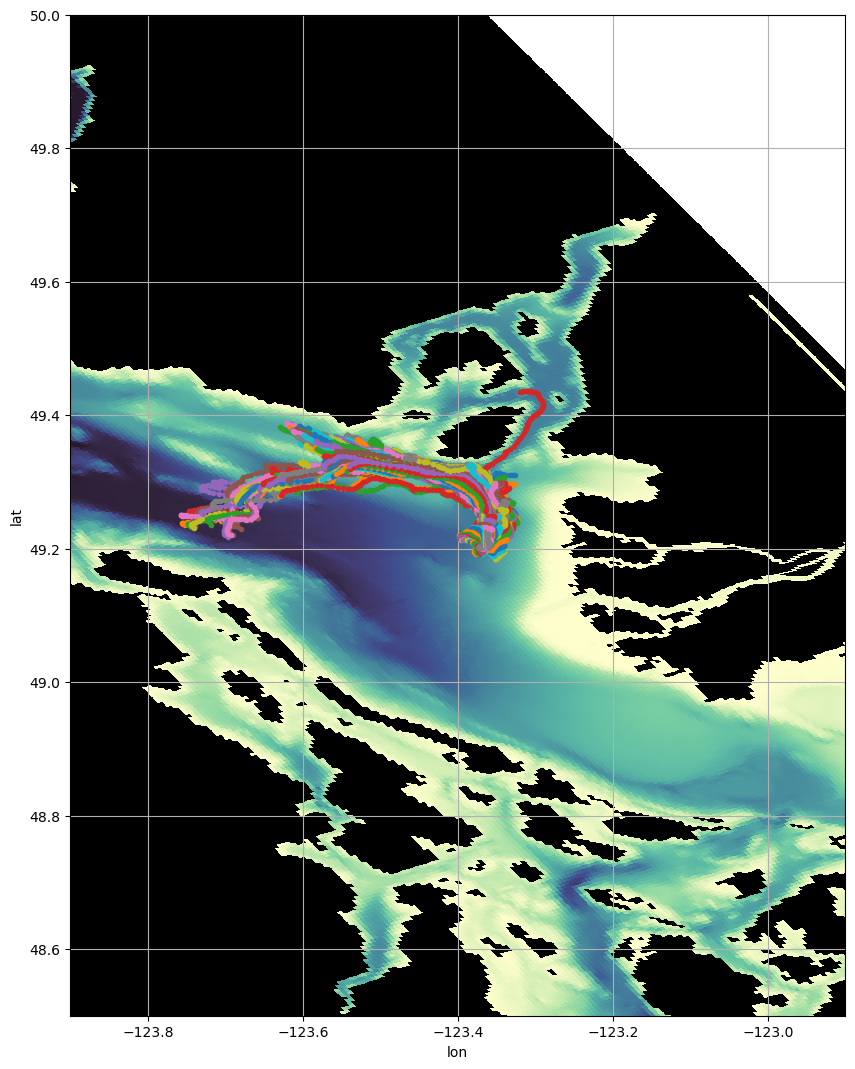

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 13))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-123.9, -122.9)
ax.set_ylim(48.5, 50);
# 
for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    ax.plot(x, y, '.-')
# ax.plot(data.lat[0,0], data.lon[0,0], 'o')
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.grid();

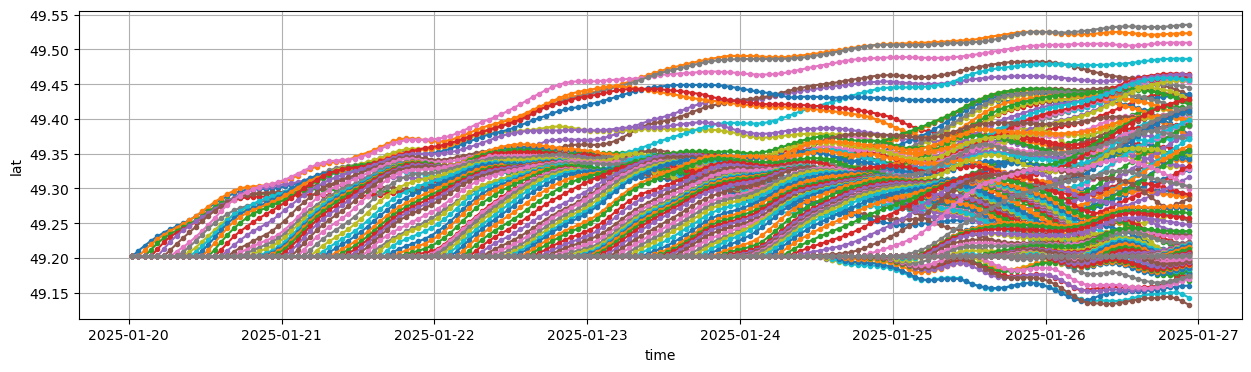

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.lat[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.set_ylabel('lat')
ax.set_xlabel('time')
ax.grid();

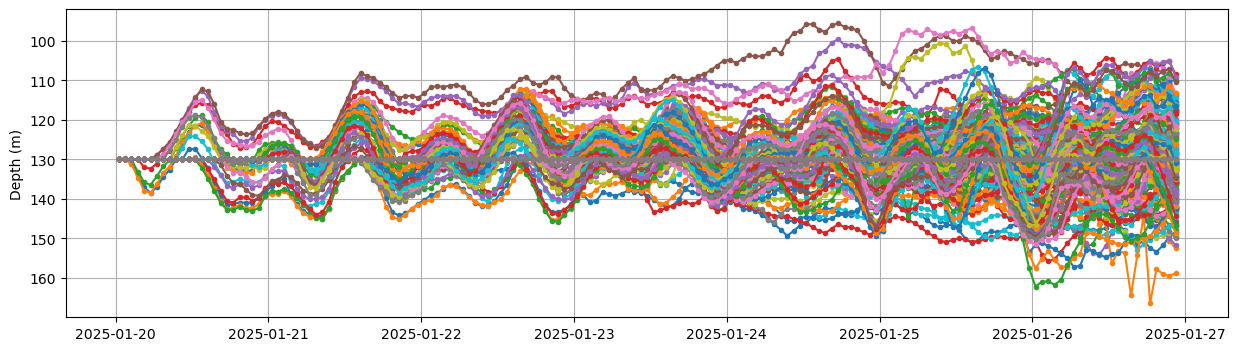

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.z[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.grid();

In [4]:
d = [50., 70., 100., 130., 160.]
np.repeat(d, 30/len(d))

array([ 50.,  50.,  50.,  50.,  50.,  50.,  70.,  70.,  70.,  70.,  70.,
        70., 100., 100., 100., 100., 100., 100., 130., 130., 130., 130.,
       130., 130., 160., 160., 160., 160., 160., 160.])

/ocean/gwatts/home/analysis-grace/runs/tidal_runs/passive_particles_for_20-1-2025_run_7_days_130m.zarr


In [16]:
dn = '/ocean/gwatts/home/analysis-grace/runs/'
# fn = 'passive_particles_for_20-1-2025_run_7_days_130m.zarr'


fn = os.listdir(dn+'tidal_runs/')  # Includes files and folders
# # Optional: Only include files (not subfolders)
# fn = [f for f in fn if os.path.isfile(os.path.join(dn, f))]

print(fn)

for ii in range(len(fn)):
    ds = xr.open_dataset(dn+'tidal_runs/'+fn[ii])
    # df = data.to_dataframe().reset_index()

    df = {var: ds[var].values for var in ds.data_vars}
    # savemat(fn+".mat", {"data": df.to_dict("list")})

    savemat(dn+"matfiles/"+fn[ii]+".mat", df)

# nobs = data.obs.shape[0]
# ntraj = data.trajectory.shape[0]
# print (nobs, ntraj)
# pring(df)

['passive_particles_for_24-8-2024_run_7_days_100m.zarr', 'passive_particles_for_20-1-2025_run_7_days_130m.zarr', 'passive_particles_for_24-8-2024_run_7_days_50m.zarr', 'passive_particles_for_9-6-2024_run_7_days_100m.zarr', 'passive_particles_for_9-6-2024_run_7_days_50m.zarr', 'passive_particles_for_20-1-2025_run_7_days_50m.zarr', 'passive_particles_for_28-7-2024_run_7_days_70m.zarr', 'passive_particles_for_24-8-2024_run_7_days_130m.zarr', 'passive_particles_for_9-6-2024_run_7_days_160m.zarr', 'passive_particles_for_28-7-2024_run_7_days_50m.zarr', 'passive_particles_for_20-1-2025_run_7_days_200m.zarr', 'passive_particles_for_28-7-2024_run_7_days_160m.zarr', 'passive_particles_for_24-8-2024_run_7_days_160m.zarr', 'passive_particles_for_20-1-2025_run_7_days_100m.zarr', 'passive_particles_for_9-6-2024_run_7_days_70m.zarr', 'passive_particles_for_9-6-2024_run_7_days_130m.zarr', 'passive_particles_for_20-1-2025_run_7_days_70m.zarr', 'passive_particles_for_28-7-2024_run_7_days_130m.zarr', 'pa

In [13]:
# savemat(dn+"matfiles/"+fn+".mat", df)
print(fn)

[]


In [3]:
dn = '/ocean/gwatts/home/analysis-grace/runs/tidal_runs/'
file_names = os.listdir(dn)  # Includes files and folders
# # Optional: Only include files (not subfolders)
# file_names = [f for f in file_names if os.path.isfile(os.path.join(dn, f))]

print(file_names)

['passive_particles_for_24-8-2024_run_7_days_100m.zarr', 'passive_particles_for_20-1-2025_run_7_days_130m.zarr', 'passive_particles_for_24-8-2024_run_7_days_50m.zarr', 'passive_particles_for_9-6-2024_run_7_days_100m.zarr', 'passive_particles_for_9-6-2024_run_7_days_50m.zarr', 'passive_particles_for_20-1-2025_run_7_days_50m.zarr', 'passive_particles_for_28-7-2024_run_7_days_70m.zarr', 'passive_particles_for_24-8-2024_run_7_days_130m.zarr', 'passive_particles_for_9-6-2024_run_7_days_160m.zarr', 'passive_particles_for_28-7-2024_run_7_days_50m.zarr', 'passive_particles_for_20-1-2025_run_7_days_200m.zarr', 'passive_particles_for_28-7-2024_run_7_days_160m.zarr', 'passive_particles_for_24-8-2024_run_7_days_160m.zarr', 'passive_particles_for_20-1-2025_run_7_days_100m.zarr', 'passive_particles_for_9-6-2024_run_7_days_70m.zarr', 'passive_particles_for_9-6-2024_run_7_days_130m.zarr', 'passive_particles_for_20-1-2025_run_7_days_70m.zarr', 'passive_particles_for_28-7-2024_run_7_days_130m.zarr', 'pa

In [9]:
range(len(file_names))

range(0, 21)

In [5]:
file_names[1]

'passive_particles_for_20-1-2025_run_7_days_130m.zarr'